___
<h1 style="color:blue;">DBSCAN Clustering</h1>

___


## Introduction to DBSCAN Clustering

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm that groups together data points that are closely packed based on a distance measurement and a minimum number of points. It is particularly useful for identifying clusters of arbitrary shapes and handling noise in the data.


## Key Concepts

- **Core Points:** A data point is considered a core point if it has at least a specified number of points (MinPts) within a specified radius (eps).
- **Border Points:** A data point that is reachable from a core point but does not have enough MinPts within its own radius.
- **Noise Points:** Data points that are neither core points nor border points.
- **Reachability:** A data point `p` is reachable from another data point `q` if `q` is a core point and there is a path of core points leading from `q` to `p`.

## Algorithm

1. Randomly select a data point `p`.
2. Retrieve all points density-reachable from `p` w.r.t. `eps` and `MinPts`.
3. If `p` is a core point, a cluster is formed.
4. If `p` is a border point, no points are density-reachable from `p`, so a new point is selected.
5. Repeat the process until all points have been processed.
6. Assign each point to a cluster or mark it as noise.
7. The algorithm has two hyperparameters: `eps` and `MinPts`.
8. `eps` defines the radius within which to search for neighboring points.
9. `MinPts` specifies the minimum number of points required to form a dense region.
10. The algorithm has a time complexity of O(n log n) and a space complexity of O(n).
11. It is sensitive to the choice of `eps` and `MinPts`.

## Diamond Data Overview

### Dataset Description

The diamond dataset contains information about various attributes of diamonds, which are often used for analysis and prediction tasks in data science and gemology. Below are the common features found in diamond datasets:

- **Carat**: The weight of the diamond, often considered one of the most important factors in determining its value.
- **Cut**: The quality of the cut of the diamond, classified as Fair, Good, Very Good, Premium, or Ideal.
- **Color**: The color of the diamond, graded on a scale from D (colorless) to Z (light yellow or brown).
- **Clarity**: The internal purity of the diamond, graded from IF (internally flawless) to I3 (included).
- **Depth**: The height of the diamond, measured from the culet to the table, as a percentage of its average girdle diameter.
- **Table**: The width of the diamond's table (the flat facet on the top of the diamond), as a percentage of its average girdle diameter.
- **Price**: The price of the diamond in USD.
- **Dimensions**: Additional measurements such as length, width, and height in millimeters.
- **Symmetry**: Evaluation of the diamond's symmetry based on visual inspection.
- **Polish**: The quality of the diamond's polish on the surface.
- **Fluorescence**: Whether the diamond exhibits fluorescence under ultraviolet light.
- **Certificate**: Information about the diamond's certification and authenticity.

### Dataset Source

The diamond dataset is commonly sourced from Seaborn, a popular data visualization library in Python. It is often used for educational purposes and as a sample dataset for machine learning and data analysis tasks.


___
## <span style="color:blue;">Data Exploration and Preprocessing</span>

___


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Load the dataset
df = sns.load_dataset('diamonds')

# Encode categorical columns 'cut', 'color', and 'clarity'
label_encoder = LabelEncoder()
df['cut'] = label_encoder.fit_transform(df['cut'])
df['color'] = label_encoder.fit_transform(df['color'])
df['clarity'] = label_encoder.fit_transform(df['clarity'])

# data information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int32  
 2   color    53940 non-null  int32  
 3   clarity  53940 non-null  int32  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int32(3), int64(1)
memory usage: 3.5 MB


>  Making Histograms of the data to understand the distribution of the data.

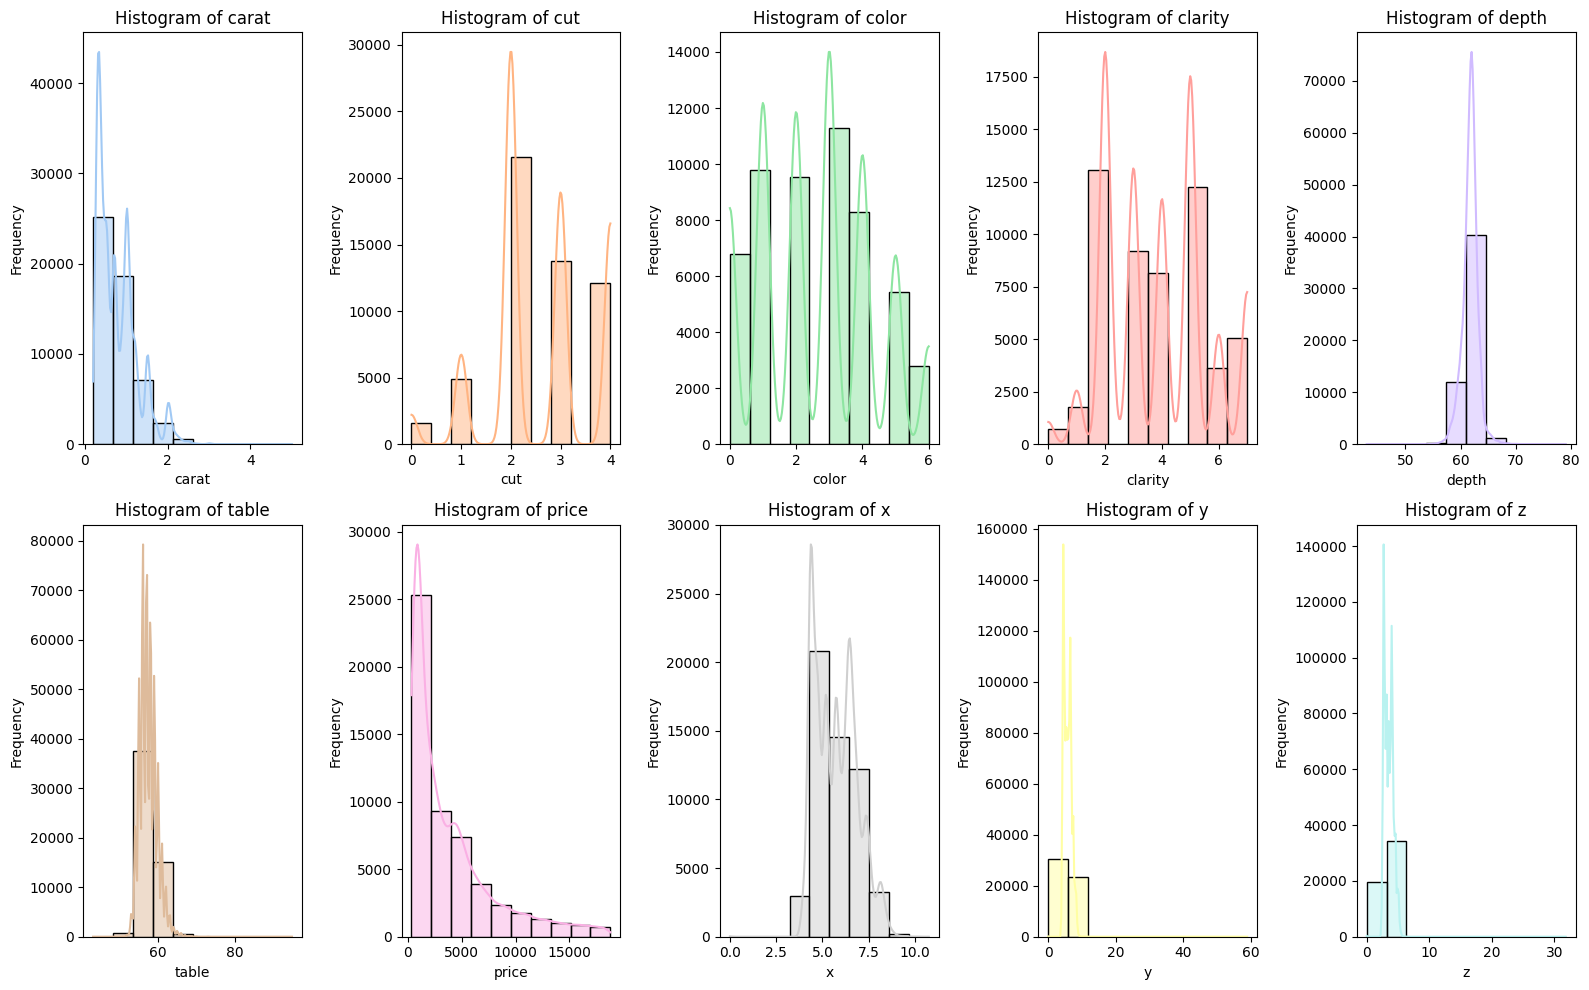

In [2]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Define a color palette with different colors for each column
palette = sns.color_palette('pastel', len(df.columns))

# Iterate through each column and plot a histogram with a different color
for i, col in enumerate(df.columns):
    plt.subplot(2,5, i + 1)
    sns.histplot(df[col], bins=10, kde=True, color=palette[i], edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

> Making box plots to understand the spread of the data.

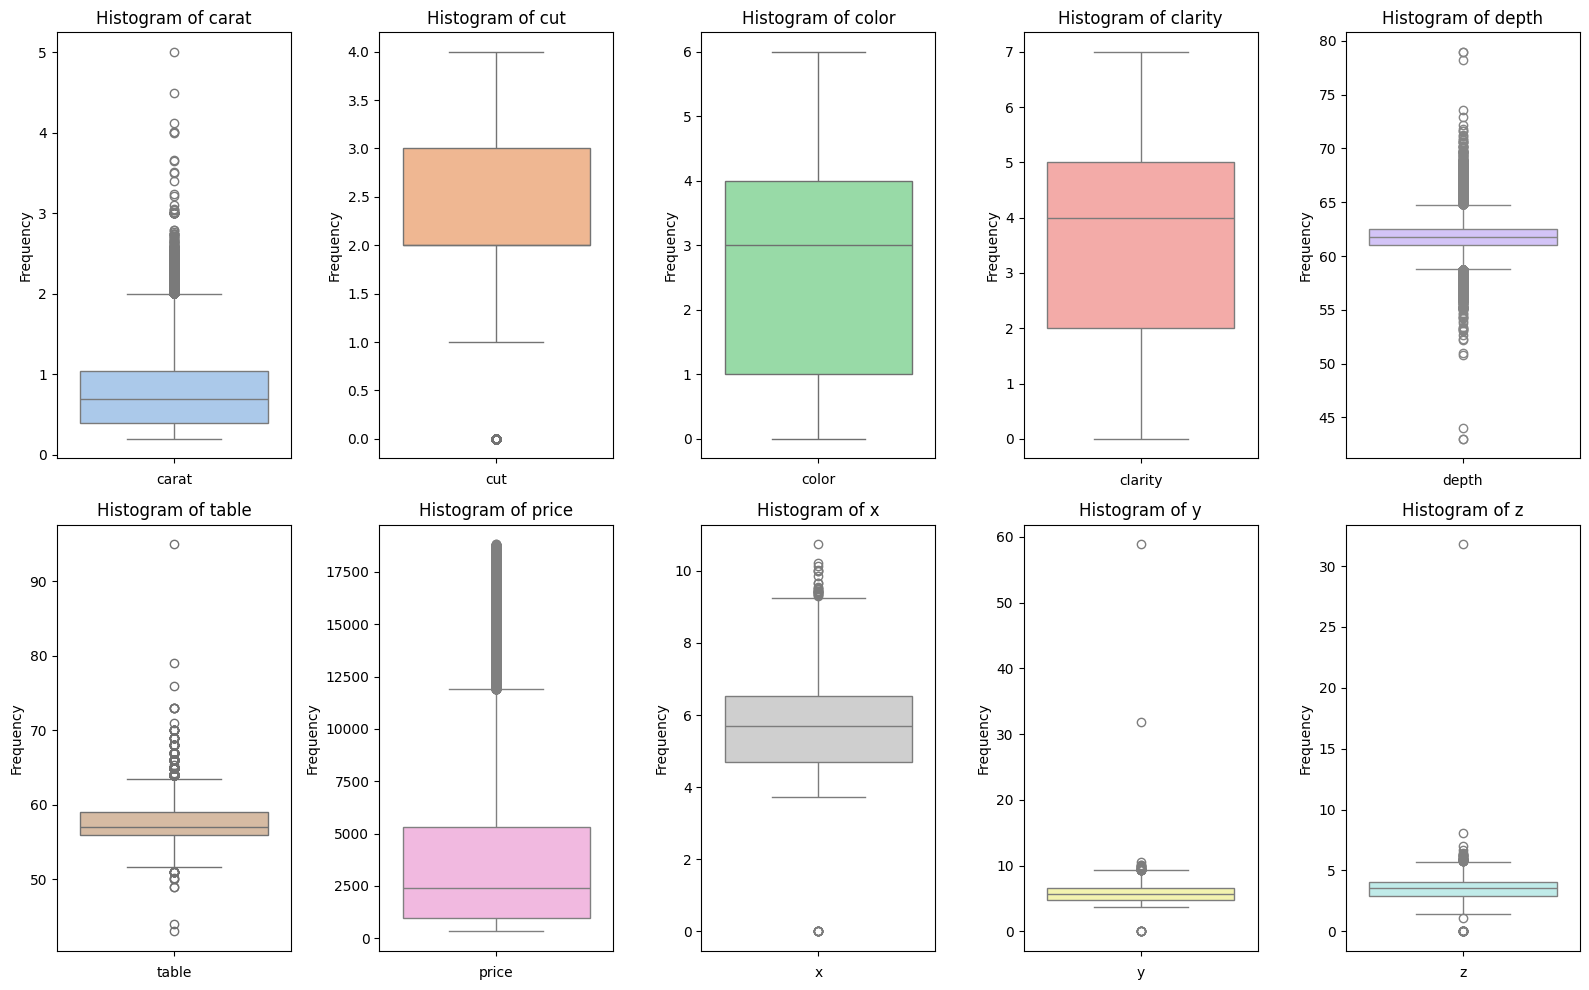

In [3]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Define a color palette with different colors for each column
palette = sns.color_palette('pastel', len(df.columns))

# Iterate through each column and plot a histogram with a different color
for i, col in enumerate(df.columns):
    plt.subplot(2, 5, i + 1)
    sns.boxplot(df[col], color=palette[i])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

## Preprocessing

In [4]:
# Separate features
X_diamond = df.drop(columns=['price'])  # Adjust 'target_column' as per your dataset

# Standardize the features
scaler = StandardScaler()
X_scaled_diamond = scaler.fit_transform(X_diamond)

### Correlation Analysis

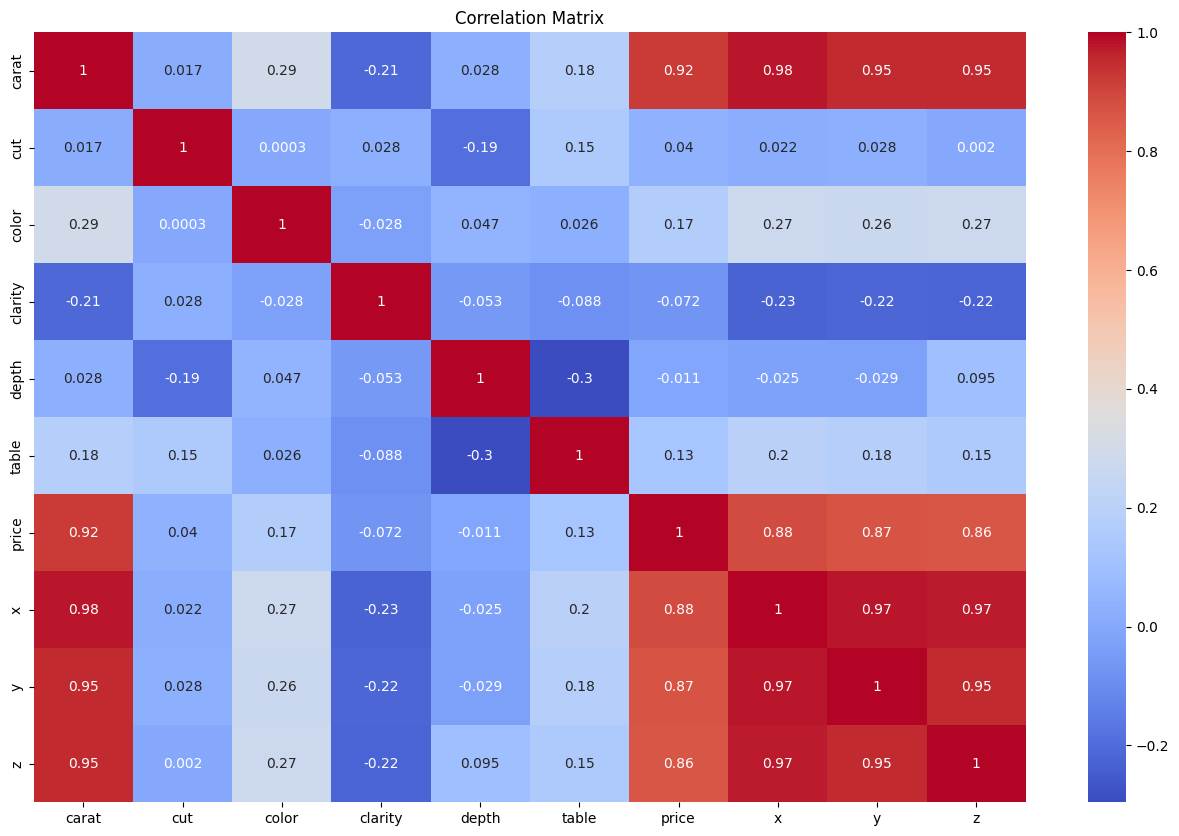

In [5]:
# Calculating the Correlation 
correlation = df.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

___
## <span style="color:blue;">Model Development</span>
___

### Scikit-learn DBSCAN Clustering Model:

In [6]:
# Initialize DBSCAN model
dbscan_diamond = DBSCAN(eps=0.5, min_samples=5)

# Fit and predict clusters
cluster_labels_diamond = dbscan_diamond.fit_predict(X_scaled_diamond)

# Check unique cluster labels
unique_labels_diamond = pd.Series(cluster_labels_diamond).unique()
print(f'Unique cluster labels: {unique_labels_diamond}')

Unique cluster labels: [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23 220  24  25  36 277 297  26  27  28  29  30
 118  31  88  32  33  34  35  37  38  39  40  41  55  42  57  43  67  44
  45  46 137  47  48  49  50  95  51  52 110  53  54  56  58  59  60  61
  62  63  64 176  65  66 128 101  68  69  70 133  71  72  73  79 115  92
  74  75  76  77 129  78  80  81  82 300  83  84  85 159  86  87  91 123
  89 170 265  90 112  93  94 192 670  96  97  98  99 100 197 634 102 103
 157 140 104 105 106 107 108 109 119 111 113 222 114 622 116 117 217 120
 130 121 122 124 125 126 127 136 167 150 141 206 158 189 672 131 132 134
 135 674 248 657 610 138 139 162 226 142 143 144 145 146 147 236 633 156
 148 149 168 151 152 163 153 154 155 169 194 199 204 219 160 673 161 198
 174 165 164 675 166 258 207 202 200 186 655 171 172 525 173 241 175 188
 231 178 191 177 179 183 180 181 182 184 185 196 190 187 625 247 256 330
 531 274 193 240 195 273 216

___
## <span style="color:blue;">Model Evaluation</span>

___

In [7]:
# Evaluate clustering with Silhouette Score
if len(unique_labels_diamond) > 1:  # Ensure more than one cluster found
    silhouette_diamond = silhouette_score(X_scaled_diamond, cluster_labels_diamond)
    print(f'Silhouette Score: {silhouette_diamond}')
else:
    print('Silhouette Score cannot be computed with one cluster.')

# Evaluate clustering with Calinski-Harabasz Index
if len(unique_labels_diamond) > 1:  # Ensure more than one cluster found
    calinski_diamond = calinski_harabasz_score(X_scaled_diamond, cluster_labels_diamond)
    print(f'Calinski-Harabasz Index: {calinski_diamond}')
else:
    print('Calinski-Harabasz Index cannot be computed with one cluster.')


Silhouette Score: -0.3346728990970781
Calinski-Harabasz Index: 66.70580919832187


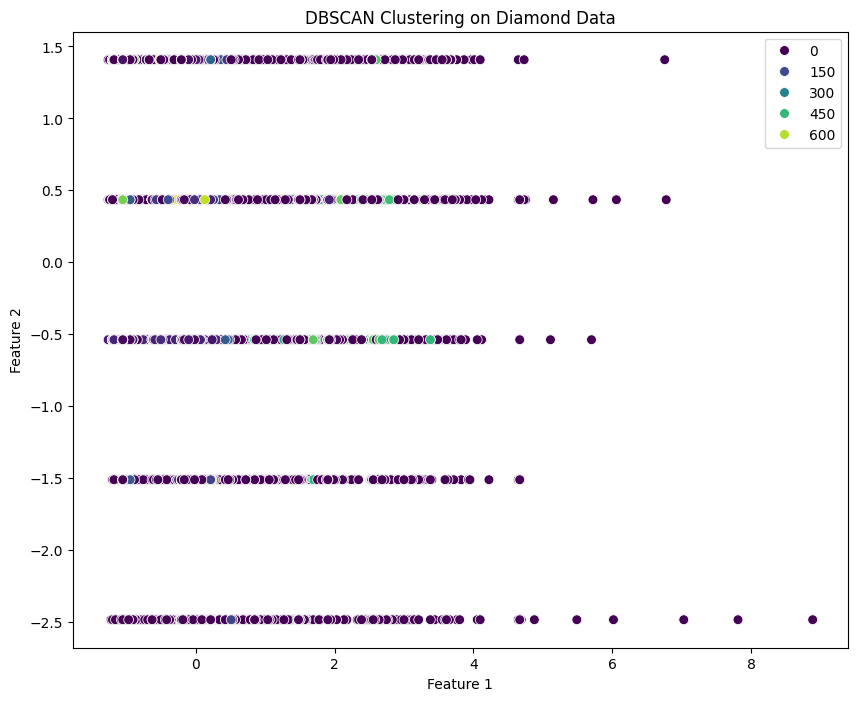

In [8]:
# Visualize the clusters with a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_scaled_diamond[:, 0], y=X_scaled_diamond[:, 1], hue=cluster_labels_diamond, palette='viridis', s=50)
plt.title('DBSCAN Clustering on Diamond Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

---
## <span style="color:blue;">CONCLUSION</span>
---
### Summary of Clustering Evaluation

The DBSCAN clustering algorithm was evaluated using two key metrics:

- **Silhouette Score**: The silhouette score measures how similar each point is to its own cluster compared to other clusters. A score close to 1 indicates dense, well-separated clusters, while a negative score like -0.3347 suggests overlapping clusters or that points may have been assigned to the wrong cluster.
  
- **Calinski-Harabasz Index**: This index evaluates cluster density and separation. Higher values indicate denser and more well-separated clusters. With a score of 66.7058, it suggests reasonable cluster quality but could potentially be improved.

### Insights and Recommendations

Based on the evaluation metrics:

- The DBSCAN algorithm shows challenges with cluster separation as indicated by the negative silhouette score.
- Further analysis and possibly adjusting the algorithm parameters (such as epsilon and minimum samples) might improve cluster quality.
- Consider exploring alternative clustering algorithms like K-Means or Hierarchical Clustering, which may perform better depending on the dataset characteristics.

### Acknowledgments

- **Data Source**: The diamond dataset used in this analysis is publicly available and contains various attributes related to diamond characteristics.
- **Tools**: Python, pandas, scikit-learn, and matplotlib were used for data preprocessing, clustering model development, evaluation, and visualization.

Overall, while DBSCAN provides insights into the structure of the diamond dataset, further refinement is needed to achieve more distinct and meaningful clusters.
